<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                       0
source                                             0
name                                               0
description                                      738
neighborhood_overview                           9773
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4998
Length: 72, dtype: int64

In [5]:
#Calculamos el numero total de la población "n"
Barcelona['price']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
14913 non-null  object
dtypes: object(1)
memory usage: 148.0+ KB


In [6]:
Barcelona['price'] = pd.to_numeric(
    Barcelona['price'].astype(str).str.replace('$', ''),
    errors='coerce'
)

In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['price'].max()
Min=Barcelona['price'].min()
Limites= [Min, Max]
Limites

[9.0, 999.0]

In [8]:
#Calculamos el rango R
R=Max-Min
R

990.0

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

63.138642377162384

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(8.9, 999.1, 16)
intervalos

array([  8.9       ,  74.91333333, 140.92666667, 206.94      ,
       272.95333333, 338.96666667, 404.98      , 470.99333333,
       537.00666667, 603.02      , 669.03333333, 735.04666667,
       801.06      , 867.07333333, 933.08666667, 999.1       ])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1 (8.9-74 price)", "Categoría2 (74.1-140 price)","Categoría3 (140.1-206.94 price)", "Categoría4 (206.95-272.95 price)",
             "Categoría5 (272.96-338.96 price)", "Categoría6 (338.97-404.98 price)","Categoría7 (404.99-470.99 price)", "Categoría8 (471-537 price)", "Categoría9 (537.1-603.02 price)", "Categoría10 (603.03-669 price)","Categoría11 (669.1-735 price)", "Categoría12 (735.1-801.06 price)",
             "Categoría13 (801.07-867 price)", "Categoría14 (868-933 price)","Categoría15 (934-999.1 price)"
             ]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['price']=pd.cut(x= Barcelona['price'], bins=intervalos, labels= categorias)
Barcelona['price']

0        Categoría4 (206.95-272.95 price)
1        Categoría6 (338.97-404.98 price)
2         Categoría3 (140.1-206.94 price)
3             Categoría2 (74.1-140 price)
4        Categoría5 (272.96-338.96 price)
                       ...               
18922     Categoría3 (140.1-206.94 price)
18923    Categoría4 (206.95-272.95 price)
18924     Categoría3 (140.1-206.94 price)
18925    Categoría4 (206.95-272.95 price)
18926    Categoría4 (206.95-272.95 price)
Name: price, Length: 18927, dtype: category
Categories (15, object): ['Categoría1 (8.9-74 price)' < 'Categoría2 (74.1-140 price)' < 'Categoría3 (140.1-206.94 price)' < 'Categoría4 (206.95-272.95 price)' ... 'Categoría12 (735.1-801.06 price)' < 'Categoría13 (801.07-867 price)' < 'Categoría14 (868-933 price)' < 'Categoría15 (934-999.1 price)']

In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['price'].value_counts().reset_index()
Tabla_freq

price  count
0          Categoría1 (8.9-74 price)   3746
1        Categoría2 (74.1-140 price)   3617
2    Categoría3 (140.1-206.94 price)   2462
3   Categoría4 (206.95-272.95 price)   1767
4   Categoría5 (272.96-338.96 price)   1312
5   Categoría6 (338.97-404.98 price)    765
6   Categoría7 (404.99-470.99 price)    382
7         Categoría8 (471-537 price)    226
8    Categoría9 (537.1-603.02 price)    124
9     Categoría10 (603.03-669 price)     70
10     Categoría11 (669.1-735 price)     47
11  Categoría12 (735.1-801.06 price)     38
12    Categoría13 (801.07-867 price)     30
13     Categoría15 (934-999.1 price)     28
14       Categoría14 (868-933 price)     22

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

price  count
0          Categoría1 (8.9-74 price)   3746
1        Categoría2 (74.1-140 price)   3617
2    Categoría3 (140.1-206.94 price)   2462
3   Categoría4 (206.95-272.95 price)   1767
4   Categoría5 (272.96-338.96 price)   1312
5   Categoría6 (338.97-404.98 price)    765
6   Categoría7 (404.99-470.99 price)    382
7         Categoría8 (471-537 price)    226
8    Categoría9 (537.1-603.02 price)    124
9     Categoría10 (603.03-669 price)     70
10     Categoría11 (669.1-735 price)     47
11  Categoría12 (735.1-801.06 price)     38
12    Categoría13 (801.07-867 price)     30
13     Categoría15 (934-999.1 price)     28
14       Categoría14 (868-933 price)     22

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('price')
Filtro_index

count
price                                  
Categoría1 (8.9-74 price)          3746
Categoría2 (74.1-140 price)        3617
Categoría3 (140.1-206.94 price)    2462
Categoría4 (206.95-272.95 price)   1767
Categoría5 (272.96-338.96 price)   1312
Categoría6 (338.97-404.98 price)    765
Categoría7 (404.99-470.99 price)    382
Categoría8 (471-537 price)          226
Categoría9 (537.1-603.02 price)     124
Categoría10 (603.03-669 price)       70
Categoría11 (669.1-735 price)        47
Categoría12 (735.1-801.06 price)     38
Categoría13 (801.07-867 price)       30
Categoría15 (934-999.1 price)        28
Categoría14 (868-933 price)          22

Text(0, 0.5, 'Frecuencia')

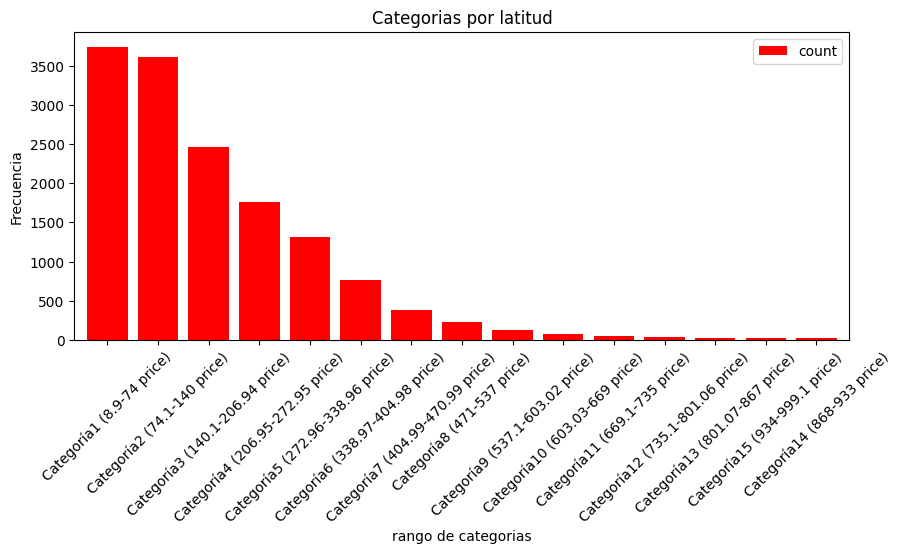

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')